<a href="https://colab.research.google.com/github/PabloJRW/clustering/blob/main/proyecto_country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Carga de datos

In [2]:
df_country = pd.read_csv('https://raw.githubusercontent.com/PabloJRW/clustering/main/datasets/country-data.csv')
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


#### Valores nulos

In [3]:
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### Duplicados

In [4]:
df_country.duplicated().sum()

0

#### Análisis de distribución

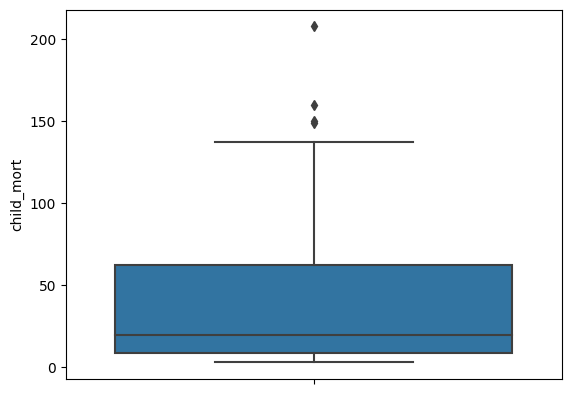

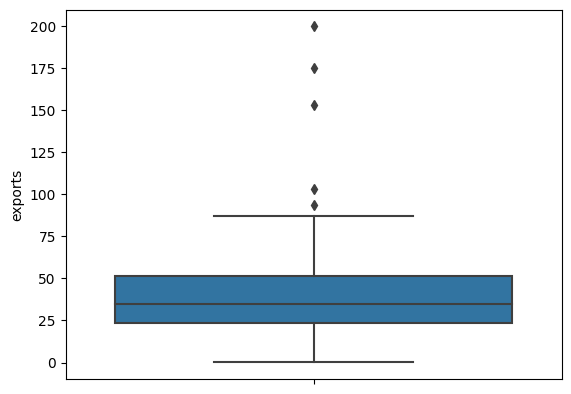

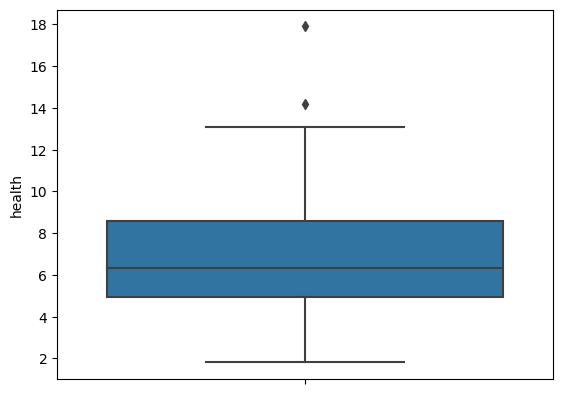

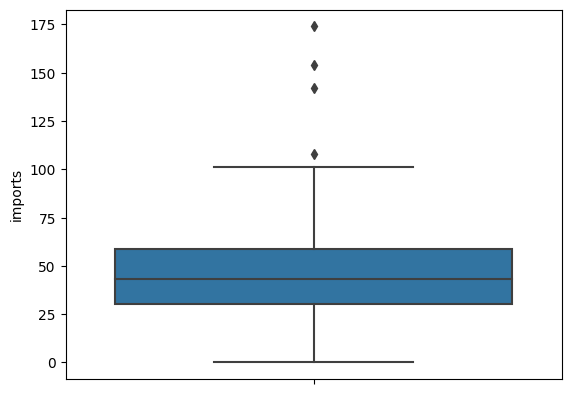

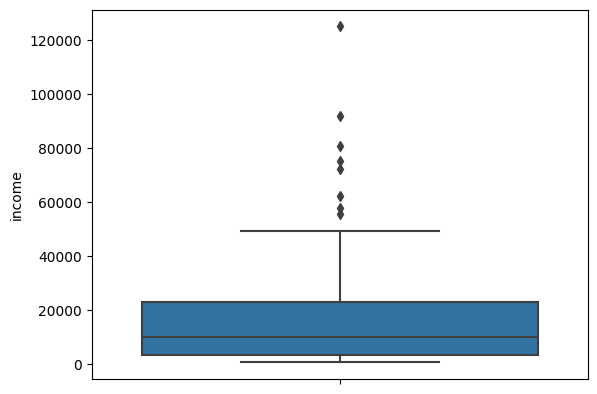

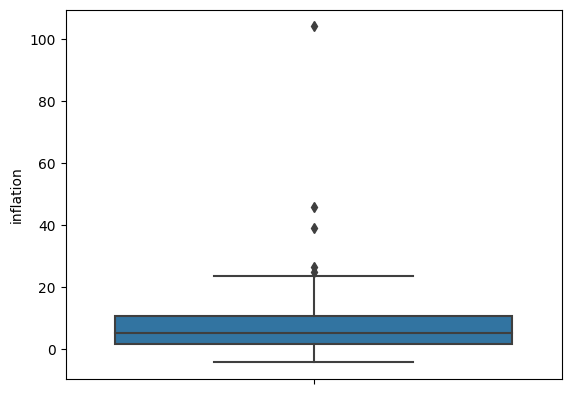

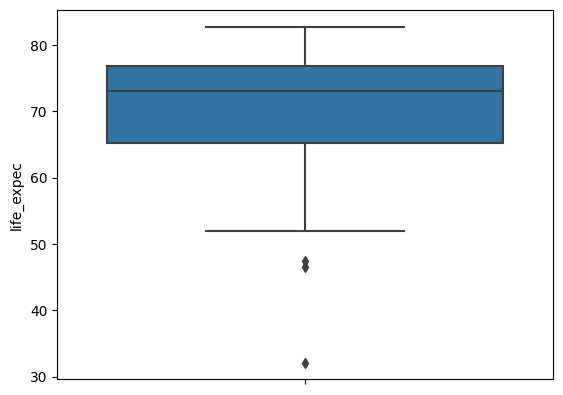

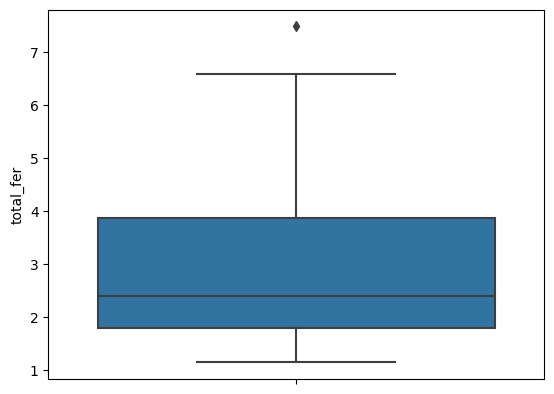

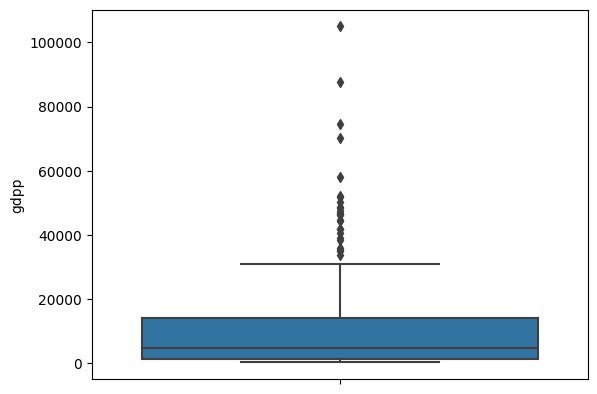

In [5]:
int_cols = df_country.select_dtypes(exclude='object').columns

for col in int_cols:
  sns.boxplot(y=df_country[col])
  plt.show()

#### Correlación

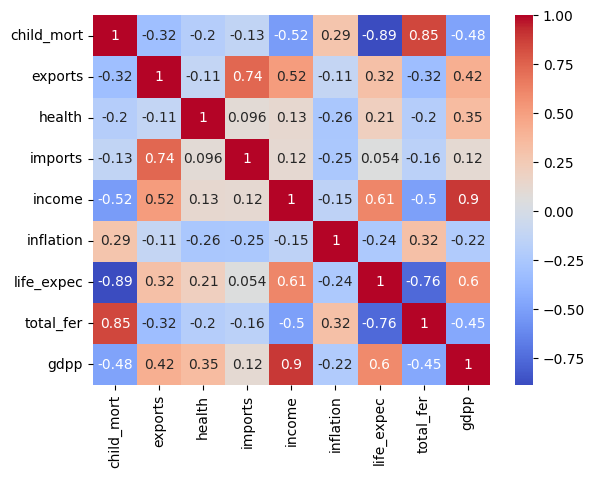

In [6]:
sns.heatmap(df_country[int_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

#### Escalar datos

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_country.drop('country', axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df_country.drop('country', axis=1).columns)
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


PCA

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(df_scaled)
pca_data = pca.transform(df_scaled)
pca_data

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [9]:
var = pca.explained_variance_ratio_
var

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

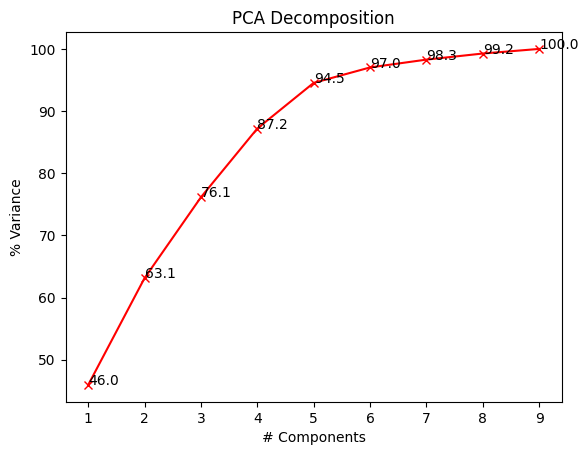

In [10]:
cum_var = np.cumsum(np.round(var, decimals=4)*100)

plt.plot(cum_var, 'r-x')
plt.title('PCA Decomposition')
components = list(np.arange(1,10))
for ncomp, vari in enumerate(cum_var):
  plt.annotate(text=np.round(vari, decimals=1), xy=(ncomp, vari))
plt.xticks(ticks=np.arange(0,9), labels=np.arange(1,10))
plt.xlabel("# Components")
plt.ylabel("% Variance")
plt.show()

In [11]:
pca_components = pd.DataFrame(pca_data[:, :4].copy())
pca_components

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


## Clustering

### KMeans

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sum_of_squared_distances = []
silhouetthe_scores = []
K = np.arange(2, 15)
for k in K:
  kmeans = KMeans(n_clusters=k, n_init='auto')
  y = kmeans.fit_predict(pca_components)
  sum_of_squared_distances.append(kmeans.inertia_)
  silhouetthe_scores.append(silhouette_score(pca_components, y))

#### Elbow Method

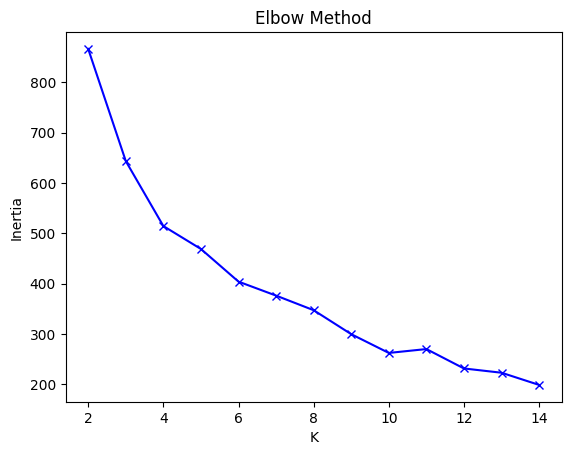

In [13]:
plt.plot(K, sum_of_squared_distances, 'b-x')
plt.title("Elbow Method")
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

Silhouette

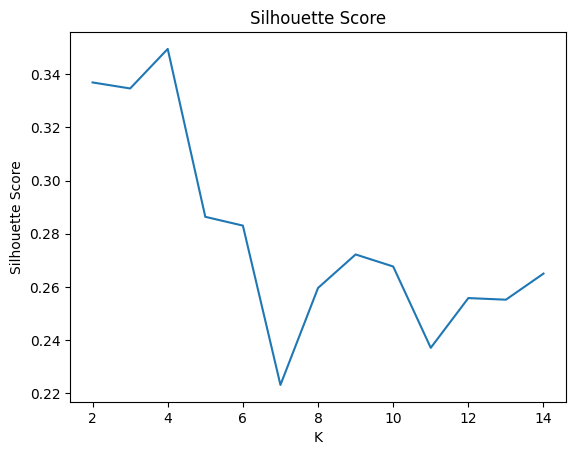

In [14]:
plt.plot(K, silhouetthe_scores)
plt.title("Silhouette Score")
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=4, n_init='auto')
y = kmeans.fit_predict(pca_components)
print(silhouette_score(pca_components, y))
df_country['kmeans_cluster'] = y

0.34930392685434886


### Agglomerative Hierarchical Clustering

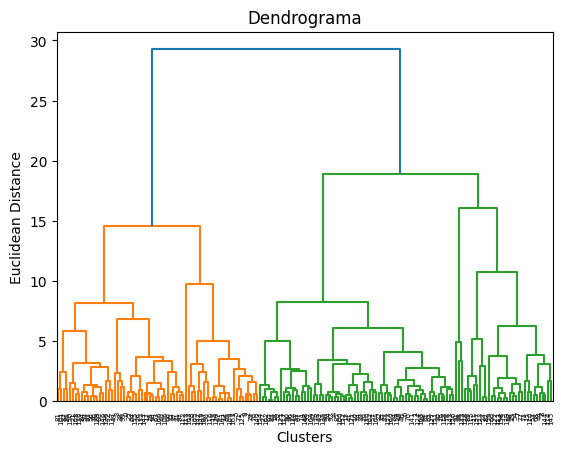

In [16]:
from scipy.cluster.hierarchy  import dendrogram, linkage

dendrogram_plot = dendrogram(linkage(pca_components, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_components)
print(silhouette_score(pca_components, y_hc))
df_country['hc_cluster'] = y_hc

0.3070110704080526


### DBSCAN

In [18]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=2)
nn_fit = nn.fit(pca_components)
distances, indices = nn_fit.kneighbors(pca_components)

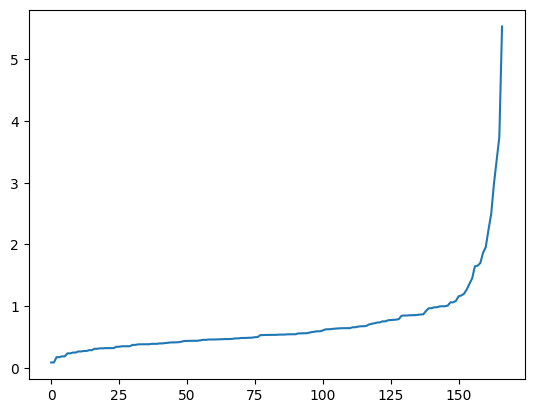

In [19]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.show()

In [20]:
eps_values = np.arange(0.75, 2, 0.1)
min_samples = np.arange(3, 12)

In [21]:
from itertools import product
from sklearn.cluster import DBSCAN

dbscan_params = list(product(eps_values, min_samples))
n_of_clusters = []
sil_score = []
for p in dbscan_params:
  y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_components)
  try:
    sil_score.append(silhouette_score(pca_components, y_dbscan))
    n_of_clusters.append(len(np.unique(n_of_clusters)))
  except:
    sil_score.append(0)